# NYC AIRBNB 2019

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("AB_NYC_2019.csv", encoding="unicode_escape")
df.dropna()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & Quiet Apt Home By The Park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
3,3831,Cozy Entire Floor Of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft By Central Park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
5,5099,Large Cozy 1 Br Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,22-06-2019,0.59,1,129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48782,36425863,Lovely Privet Bedroom With Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,07-07-2019,1.00,1,147
48790,36427429,No.2 With Queen Size Bed,257683179,HâAi,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,07-07-2019,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,07-07-2019,1.00,1,87
48805,36442252,1B-1B Apartment Near By Metro,273841667,Blaine,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100,1,2,07-07-2019,2.00,1,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
df.drop(["id", "host_name", "last_review"], axis=1, inplace=True)
df.head()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & Quiet Apt Home By The Park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,The Village Of Harlem....New York !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Cozy Entire Floor Of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft By Central Park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [40]:
df.neighbourhood.unique(
    
)

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'Murray Hill',
       "Hell's Kitchen", 'Chinatown', 'Upper West Side', 'South Slope',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'East Harlem', 'Park Slope', 'Bedford-Stuyvesant',
       'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint',
       'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'West Village', 'Gowanus', 'Flatlands',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Ridgewood', 'Morningside Heights', 'Jamaica',
       'Middle Village', 'NoHo', 'Ditmars Steinway', 'Cobble Hill',
       'Flatiron District', 'Roosevelt Island', 'Greenwich Village',
       'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point',
       'Eastchester', '

In [8]:
(df == 0).sum()

name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

In [9]:
df.fillna({"reviews_per_month": 0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [10]:
for i in range(len(df)):
    if df.availability_365[i] == 0 and df.number_of_reviews[i] != 0:
        df.drop([i], inplace=True)

In [11]:
(df == 0).sum()

name                                  0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 9
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                   4845
dtype: int64

In [12]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [13]:
top_host = df.host_id.value_counts().head()
top_host

host_id
219517861    327
107434423    232
30283594     121
137358866     98
12243051      96
Name: count, dtype: int64

<Axes: ylabel='host_id'>

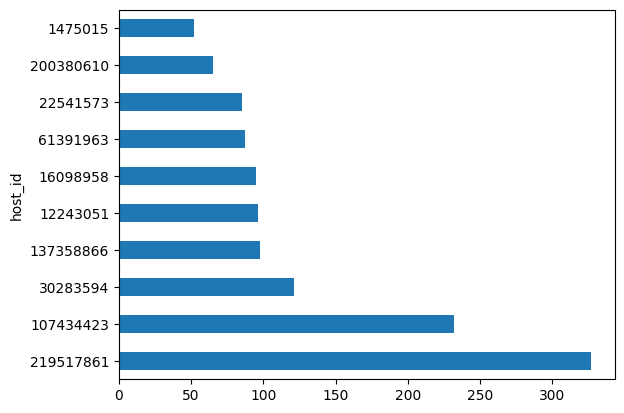

In [14]:
df.host_id.value_counts().head(10).plot(kind="barh")

<Axes: xlabel='neighbourhood_group', ylabel='count'>

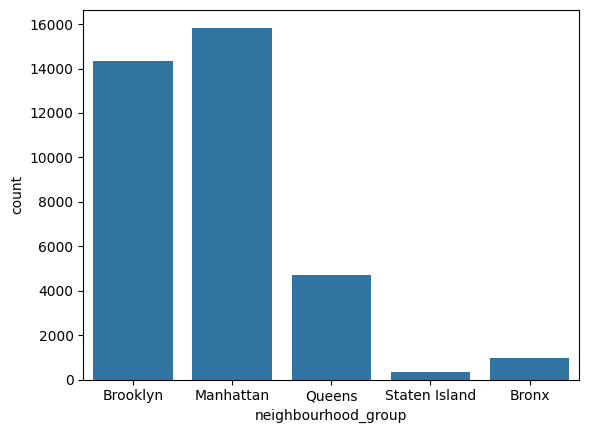

In [15]:
sns.countplot(x="neighbourhood_group", data=df)

<Axes: xlabel='room_type', ylabel='count'>

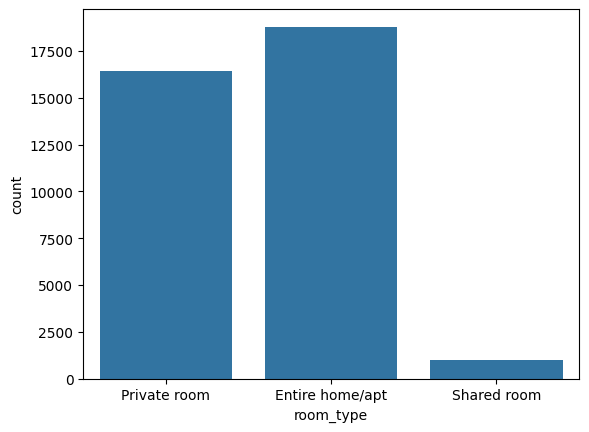

In [16]:
sns.countplot(x="room_type", data=df)

In [17]:
numbrev = df.groupby("neighbourhood_group")["number_of_reviews"].mean()

<Axes: xlabel='neighbourhood_group'>

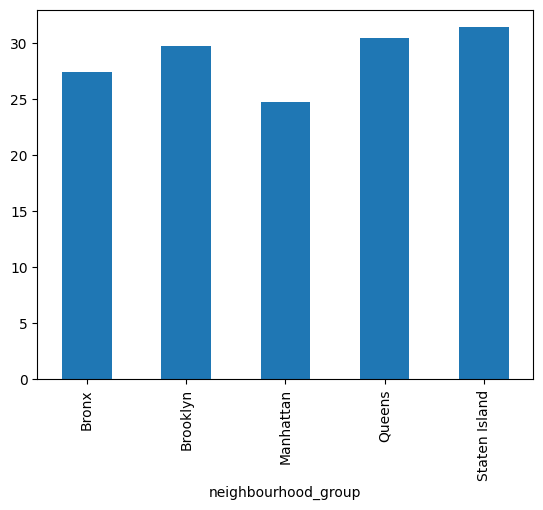

In [18]:
numbrev.plot(kind="bar")

<Axes: xlabel='neighbourhood_group'>

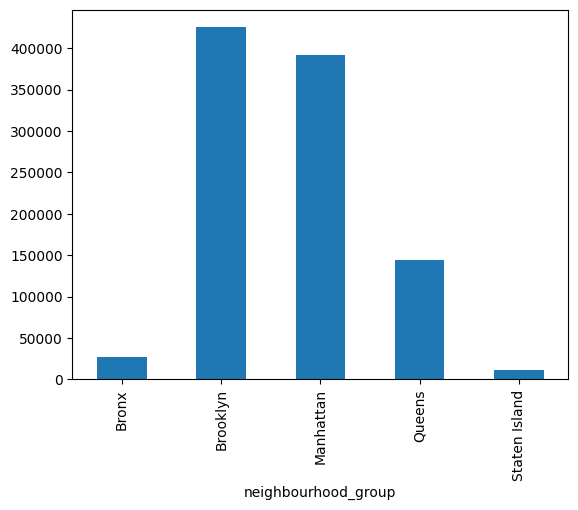

In [19]:
numbrev = df.groupby("neighbourhood_group")["number_of_reviews"].sum()
numbrev.plot(kind="bar")

c:\Users\GAURAV BHATIYA\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


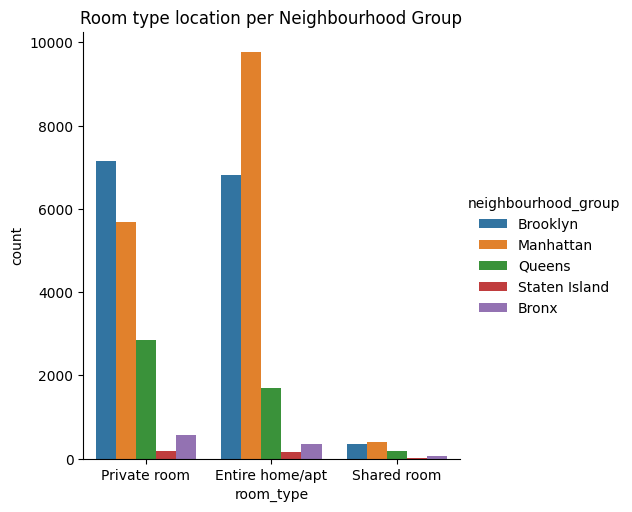

In [20]:
title = "Room type location per Neighbourhood Group"
sns.catplot(x="room_type", kind="count", hue="neighbourhood_group", data=df)
plt.title(title)
plt.show()

#which place in NYC has the highest priced Airbnb and which neighbourhood and neighbourhood group has an average highest price?

In [21]:
maxprice = df.price.max()
df.loc[df["price"] == maxprice]

# df['price'].max()

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
29238,1-Br Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.0,1,83


In [22]:
df.groupby("neighbourhood_group")["price"].mean()

neighbourhood_group
Bronx             89.317199
Brooklyn         130.691502
Manhattan        213.890923
Queens            99.965517
Staten Island    115.930636
Name: price, dtype: float64

In [23]:
maxindex = df.groupby("neighbourhood")["price"].mean().idxmax()
maxneigh = df.groupby("neighbourhood")["price"].mean().max()
print(maxindex)
print(maxneigh)

Fort Wadsworth
800.0


In [24]:
maxindexng = df.groupby("neighbourhood_group")["price"].mean().idxmax()
maxneighng = df.groupby("neighbourhood_group")["price"].mean().max()
print(maxindexng)
print(maxneighng)

Manhattan
213.89092286327485


#What are the neighbourhoods or the neighbourhood groups where the owners are preffering longer stays rather than one shorter inn type stays?

In [25]:
df.groupby("neighbourhood_group")["minimum_nights"].mean()

neighbourhood_group
Bronx             4.830072
Brooklyn          6.753579
Manhattan        10.071771
Queens            5.371060
Staten Island     4.893064
Name: minimum_nights, dtype: float64

In [26]:
df.groupby("neighbourhood")["minimum_nights"].mean()

neighbourhood
Allerton            2.184211
Arden Heights      12.000000
Arrochar            2.761905
Arverne             1.648649
Astoria             6.536364
                     ...    
Windsor Terrace     7.883929
Woodhaven           2.762500
Woodlawn            1.444444
Woodrow             7.000000
Woodside           11.237113
Name: minimum_nights, Length: 220, dtype: float64

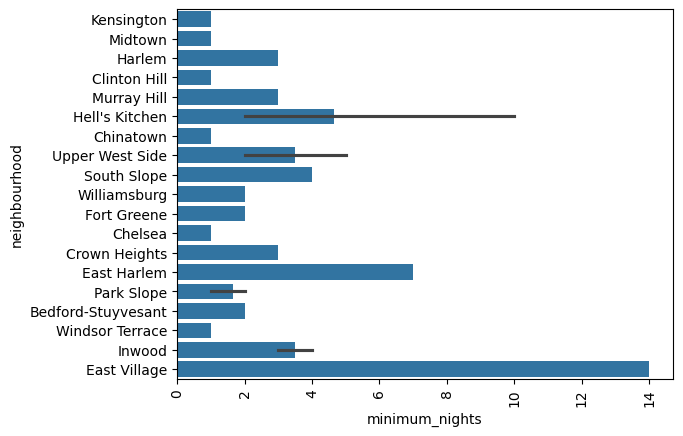

In [27]:
# plt.figure(figsize=(18,8))
sns.barplot(x=df.minimum_nights[:25], y=df.neighbourhood[:25])
plt.xticks(rotation=90)
plt.show()

#Are feedbacks more in pricier places or in the cheaper places? and are they good or bad reviews in these places?

In [28]:
reviewprice = df.sort_values("price", ascending=False)
reviewprice.head(10)

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
29238,1-Br Lincoln Center,72390391,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83
40433,2Br - The Heart Of Nyc: Manhattans Lower East ...,4382127,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,0.00,1,365
12342,"Quiet, Clean, Lit @ Les & Chinatown",3906464,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83
30268,Beautiful/Spacious 1 Bed Luxury Flat-Tribeca/Soho,18128455,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18,1,251
4377,Film Location,1177497,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03,11,365
29662,East 72Nd Townhouse By (Hidden By Airbnb),156158778,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,0.00,12,146
42523,70' Luxury Motoryacht On The Hudson,7407743,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,0.00,1,364
45666,Gem Of East Flatbush,262534951,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,6.15,2,179
44034,3000 Sq Ft Daylight Photo Studio,3750764,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,0.00,6,364
37194,Apartment New York \nHellâS Kitchens,35303743,Manhattan,Upper West Side,40.76835,-73.98367,Private room,6500,30,0,0.00,1,97


In [29]:
data_0 = df[df["price"] >= 200]
print(data_0)
data_1 = df[df["price"] <= 200]
print(data_1)

                                                    name    host_id  \
1                                  Skylit Midtown Castle       2845   
5              Large Cozy 1 Br Apartment In Midtown East       7322   
16                     Perfect For Your Parents + Garden      17571   
52                            * Original Brooklyn Loft *      56104   
54                   Beautiful Apartment In Manhattan!!!      56284   
...                                                  ...        ...   
48844    West Village Studio On Quiet Cobblestone Street  115491896   
48853     Sunny&Quiet Paradise In The Wv With Open Views  274103383   
48856  Large 3 Bed, 2 Bath , Garden , Bbq , All You Need   66993395   
48872                                      Nycity-Myhome    8636072   
48886                    Comfy 1 Bedroom In Midtown East  274311461   

      neighbourhood_group       neighbourhood  latitude  longitude  \
1               Manhattan             Midtown  40.75362  -73.98377   
5      

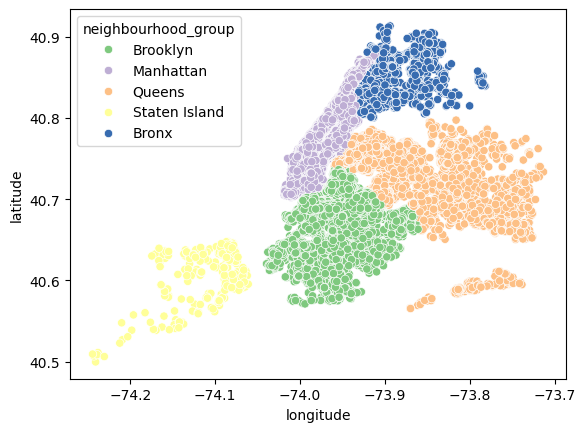

In [30]:
sns.scatterplot(df,
    x=df.longitude,
    y=df.latitude,
    hue=df.neighbourhood_group,
    palette="Accent",
)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

#Which neighbourhood is generating maximum and minimum revenues in terms of private rooms,shared rooms and entire homes?

In [31]:
roomtype = df.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
roomtype

price
neighbourhood room_type             
Allerton      Entire home/apt   1899
              Private room      1528
Arden Heights Entire home/apt    228
Arrochar      Entire home/apt   1897
              Private room       518
...                              ...
Woodlawn      Private room       279
Woodrow       Entire home/apt    700
Woodside      Entire home/apt   8082
              Private room      8189
              Shared room         65

[529 rows x 1 columns]

In [32]:
roomtype = pd.pivot_table(roomtype, values='price', index=['neighbourhood'], columns=['room_type'])


In [33]:
roomtype.sort_values('Private room', ascending = False).head(1)


room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Bedford-Stuyvesant,194778.0,116361.0,3904.0


In [34]:
roomtype.sort_values('Shared room', ascending = False).head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Hell's Kitchen,260901.0,73826.0,9035.0
Bedford-Stuyvesant,194778.0,116361.0,3904.0
Astoria,39437.0,30114.0,3520.0
Upper West Side,256343.0,61098.0,3418.0
Harlem,144856.0,100446.0,3072.0


In [35]:
roomtype.sort_values('Entire home/apt', ascending = False).head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Midtown,288613.0,89831.0,1476.0
Williamsburg,279992.0,114537.0,2298.0
Hell's Kitchen,260901.0,73826.0,9035.0
Upper West Side,256343.0,61098.0,3418.0
Upper East Side,224408.0,39218.0,2754.0


In [36]:
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].corr()

In [37]:
corr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.036995,-0.065771,0.056327,0.062819
minimum_nights,0.036995,1.000000,-0.100827,0.125124,0.128207
number_of_reviews,-0.065771,-0.100827,1.000000,-0.094763,0.108550
calculated_host_listings_count,0.056327,0.125124,-0.094763,1.000000,0.202509
availability_365,0.062819,0.128207,0.108550,0.202509,1.000000


<Axes: >

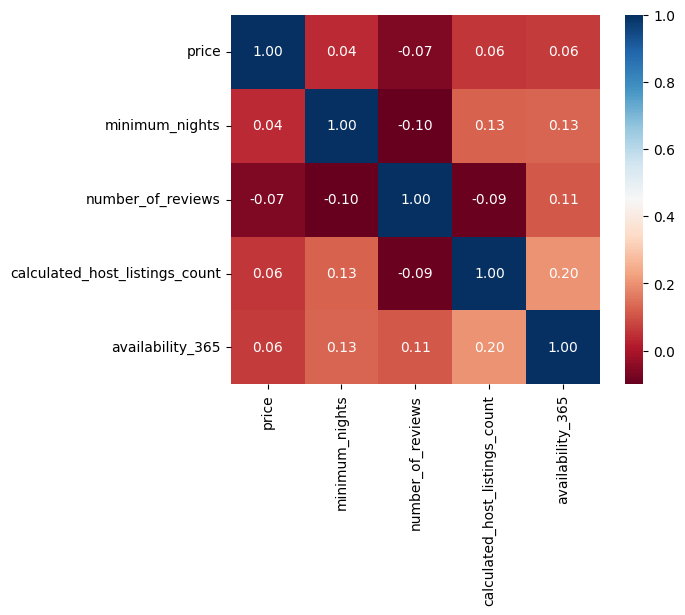

In [38]:
sns.heatmap(corr, cmap="RdBu", fmt='.2f',square=True, linecolor='white', annot=True)